In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve

In [114]:
df = pd.read_csv('cardio_train.csv',sep=';')
df = df.dropna().drop('id',axis=1)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


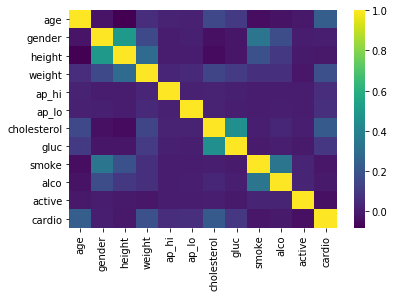

In [116]:
sns.heatmap(df.corr(),cmap='viridis')

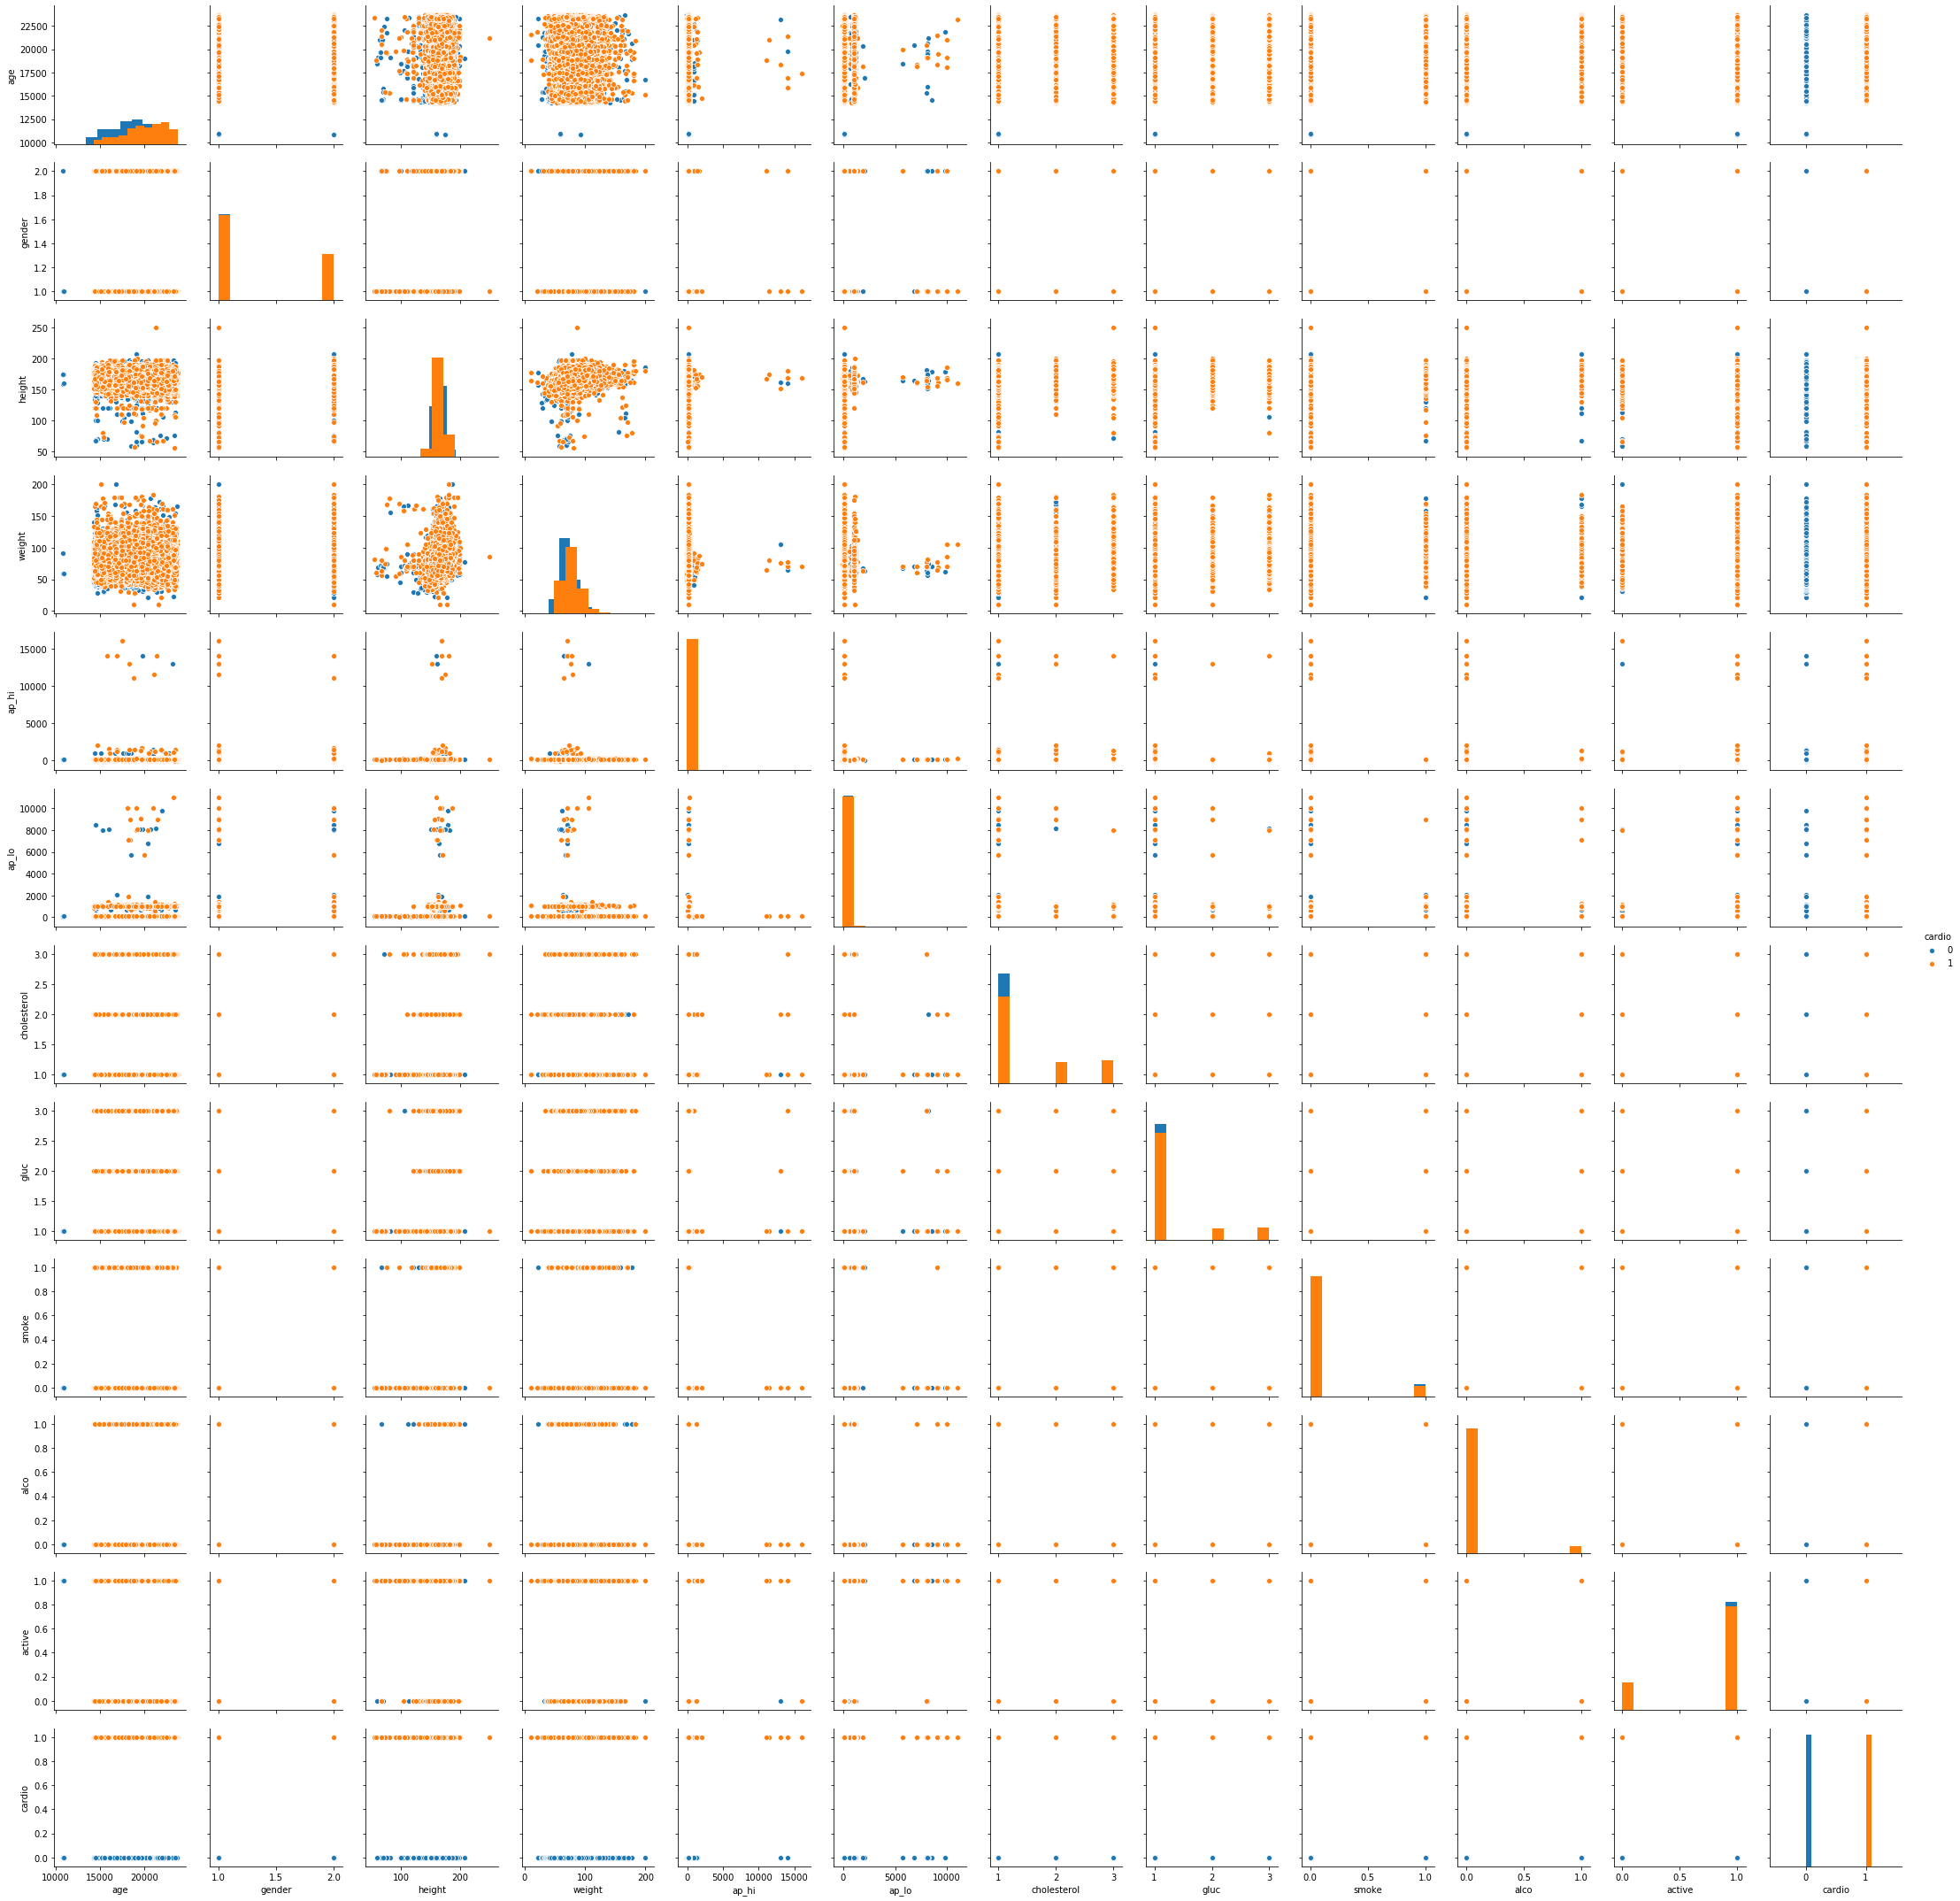

In [9]:
sns.pairplot(df,hue='cardio',diag_kind='hist')
plt.savefig('pair.png')

In [73]:
df = pd.get_dummies(data=df,columns=['gender','cholesterol'])
df.head()

,age,height,weight,ap_hi,ap_lo,gluc,smoke,alco,active,cardio,gender_1,gender_2,cholesterol_1,cholesterol_2,cholesterol_3
0,18393,168,62.0,110,80,1,0,0,1,0,0,1,1,0,0
1,20228,156,85.0,140,90,1,0,0,1,1,1,0,0,0,1
2,18857,165,64.0,130,70,1,0,0,0,1,1,0,0,0,1
3,17623,169,82.0,150,100,1,0,0,1,1,0,1,1,0,0
4,17474,156,56.0,100,60,1,0,0,0,0,1,0,1,0,0


In [74]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('cardio',axis=1),df['cardio'],random_state=0)

In [75]:


#rf_est = [10,100,200,500,1000]
#rf_scores = []
#for i in rf_est:
rfc = RandomForestClassifier(n_estimators=500, criterion = 'entropy')
rfc.fit(x_train,y_train)
#rf_scores.append(rfc.score(x_test,y_test))
rf_score = rfc.score(x_test,y_test)
print(rfc.score(x_test,y_test))

0.7120571428571428


(0.7, 0.75)

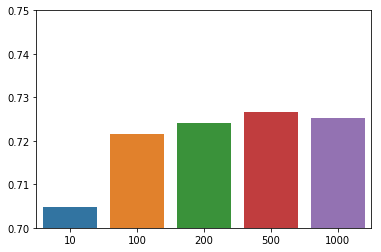

In [7]:
#sns.barplot(rf_est, rf_scores)
#plt.ylim(0.7,0.75)

In [87]:

kn_scores = []
knn = [5,9,11,15,19]

for k in knn:
    knc = KNeighborsClassifier(n_neighbors=k)
    knc.fit(x_train,y_train)
    kn_scores.append(knc.score(x_test,y_test))

(0.6, 0.75)

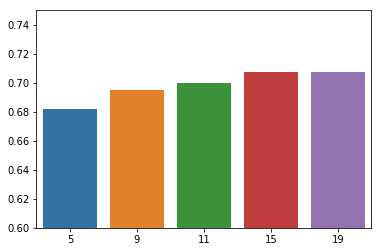

In [88]:
sns.barplot(knn, kn_scores)
plt.ylim(0.6,0.75)

In [76]:


lr_scores=[]

lr = LogisticRegression(penalty='l1',solver= 'liblinear')
lr.fit(x_train,y_train)
lr_score = accuracy_score(y_test,lr.predict(x_test))
print(accuracy_score(y_test,lr.predict(x_test)))

0.7229714285714286


In [84]:
mlp = MLPClassifier(hidden_layer_sizes=512,activation='logistic')
mlp.fit(x_train,y_train)
mlp_score = mlp.score(x_test,y_test)
print(mlp.score(x_test,y_test))

0.5040571428571429


In [90]:
#Naive Bayes 

gnb = GaussianNB()
#gnb.partial_fit(x_train, y_train,np.unique(y_train))
gnb.fit(x_train,y_train)
gnb_score = gnb.score(x_test, y_test)
print (gnb.score(x_test, y_test))

0.5981714285714286


In [80]:
knn = KNeighborsClassifier(n_neighbors=15)
mlp = MLPClassifier(hidden_layer_sizes=512,activation='relu')
lr = LogisticRegression(penalty='l1',solver= 'liblinear')
gnb = GaussianNB()
rfc = RandomForestClassifier(n_estimators=500, criterion = 'entropy')

vc = VotingClassifier(estimators=[('knn',knn),('lr',lr),('rfc',rfc)], voting='soft')

In [81]:
vc.fit(x_train,y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=15, p=2,
           weights='uniform')), ('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scalin...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)

In [82]:
vc_score = vc.score(x_test, y_test)
print (vc.score(x_test, y_test))

0.7272


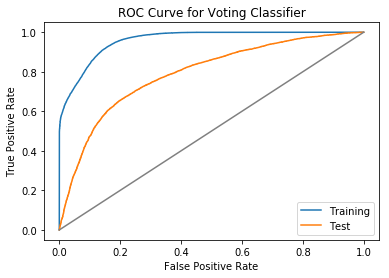

In [103]:
fpr,tpr,thres = roc_curve(y_train,vc.predict_proba(x_train)[::,1])
fpr2,tpr2,thres2 = roc_curve(y_test,vc.predict_proba(x_test)[::,1])
plt.plot(fpr,tpr,label='Training')
plt.plot(fpr2,tpr2,label='Test')
plt.plot([0,1],[0,1],c='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Voting Classifier')
plt.legend()
plt.savefig('Voting Classifier ROC.png')

In [5]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import tensorflow as tf

Using TensorFlow backend.


In [53]:
model = Sequential()
model.add(Dense(14, input_dim=14, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [54]:
batch_size = 128
epochs = 250
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data = (x_test, y_test) )

Train on 52500 samples, validate on 17500 samples
Epoch 1/250
52500/52500 [==============================] - 3s 53us/step - loss: 8.0210 - accuracy: 0.4968 - val_loss: 7.9946 - val_accuracy: 0.5040
Epoch 2/250
52500/52500 [==============================] - 2s 40us/step - loss: 8.0165 - accuracy: 0.4988 - val_loss: 7.9946 - val_accuracy: 0.5040
Epoch 3/250
52500/52500 [==============================] - 2s 39us/step - loss: 8.0034 - accuracy: 0.4994 - val_loss: 7.9946 - val_accuracy: 0.5040
Epoch 4/250
52500/52500 [==============================] - 2s 39us/step - loss: 8.0232 - accuracy: 0.4984 - val_loss: 7.9946 - val_accuracy: 0.5040
Epoch 5/250
52500/52500 [==============================] - 2s 39us/step - loss: 7.9912 - accuracy: 0.4996 - val_loss: 7.9946 - val_accuracy: 0.5040
Epoch 6/250
52500/52500 [==============================] - 2s 40us/step - loss: 8.0107 - accuracy: 0.4987 - val_loss: 7.9946 - val_accuracy: 0.5040
Epoch 7/250
52500/52500 [==============================] - 2s 

KeyboardInterrupt: 

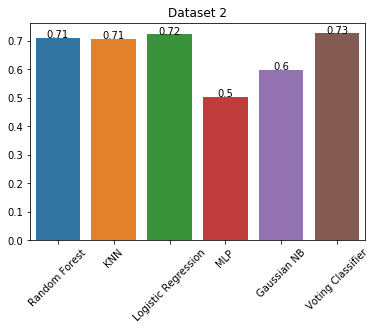

In [102]:
label = ['Random Forest','KNN','Logistic Regression','MLP','Gaussian NB','Voting Classifier']
scores = [rf_score,kn_scores[3],lr_score,mlp_score,gnb_score,vc_score]
sns.barplot(x=label,y=scores)
plt.xticks(rotation=45)
for i in range(len(label)):
    plt.text(i,scores[i],round(scores[i],2),horizontalalignment='center')
plt.title('Dataset 2')
plt.savefig('results.png')